# Beer Reviews

__Dataset is Beer Advocate data from Stanford's dataset library and contains > 1.5M rows of data__

Data Structure:
1. beer/name : Name of the beer
2. beer/beerId : Unique beer identification
3. beer/brewerId : Unique ID identifying the brewer
4. beer/style : Category that the beer falls into
5. beer/ABV : Alcohol by volume
6. review/profileName: Reviewer’s profile name / user ID
7. review/time : UNIX time when review was written
8. review/aroma : Rating based on how the beer smells [1­5]
9. review/palate : Rating based on how the beer interacts with the palate [1­5]
10. review/taste : Rating based on how the beer actually tastes [1­5]
11. review/appearance: Rating based on how the beer looks [1­5]
12. review/text : Personal observations made by the review in text format
13. review/overall : Cumulative experience of the beer is encapsulated in this rating [1­5]

Use the CSV file provided to answer the following questions:
1. Read the CSV file.
2. How many rows are there? Are there any Null Values?
3. What are the 3 strongest beers by ABV? 
4. Which breweries produce the top 3 strongest beers?
5. Which of the factors (aroma, taste, appearance, palette) are most important in determining the overall quality of a beer?
6. If I typically enjoy a beer due to its aroma and appearance, which beer style should I try?
7. Use results from (6) and find me the aroma score for an appearance scores 2.6 and 4.8


In [2]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

__Answers to Question 1 and 2__

In [3]:
#Read the CSV file
df = pd.read_csv('beer_reviews.csv')
df.head(5) # Display top 5 rows

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [4]:
#What is the shape of the data
df.shape

(1586614, 13)

In [5]:
#Describe how many null values exist and in which columns
df.isnull().sum() 

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

In [6]:
df.columns

Index(['brewery_id', 'brewery_name', 'review_time', 'review_overall',
       'review_aroma', 'review_appearance', 'review_profilename', 'beer_style',
       'review_palate', 'review_taste', 'beer_name', 'beer_abv',
       'beer_beerid'],
      dtype='object')

In [7]:
#Find all the rows with NaN 
nansdf = lambda df: df[df.isnull().any(axis=1)]

#Print the number of rows
nansdf(df).shape

(68136, 13)

In [8]:
#Let's drop the rows with NaNs. 
#Even though ABV has the highest count of NaNs, this action will catch some non-ABV rows with NaNs
#and drop them
df_nonan = df.dropna(axis=0)

In [9]:
df_nonan.shape[0] - df.shape[0]

-68136

In [10]:
# Here is the count of rows that were dropped

rows_dropped = df.shape[0] - df_nonan.shape[0]
cols_dropped = df.shape[1] - df_nonan.shape[1]
print('Rows dropped = ', rows_dropped)
print('Cols dropped = ', cols_dropped) #Sanity check


Rows dropped =  68136
Cols dropped =  0


In [11]:
abv_stats= df_nonan["beer_abv"].describe()
abv_stats

count    1.518478e+06
mean     7.042488e+00
std      2.322568e+00
min      1.000000e-02
25%      5.200000e+00
50%      6.500000e+00
75%      8.500000e+00
max      5.770000e+01
Name: beer_abv, dtype: float64

__Answer to Question 3__

In [12]:
brewery_df = df_nonan[['brewery_name', 'beer_name', 'beer_abv']]
brewery_df.head()

,brewery_name,beer_name,beer_abv
0,Vecchio Birraio,Sausa Weizen,5.0
1,Vecchio Birraio,Red Moon,6.2
2,Vecchio Birraio,Black Horse Black Beer,6.5
3,Vecchio Birraio,Sausa Pils,5.0
4,Caldera Brewing Company,Cauldron DIPA,7.7


In [13]:
brewery_df['beer_name'].unique().shape #these many unique beers

(44075,)

In [14]:
#There seem to be duplicates. Let's grab the unique beer names
unique_beer_names = brewery_df.drop_duplicates(subset = ["beer_name"])

In [15]:
unique_beer_names.shape

(44075, 3)

In [16]:
#Top 3 beers by ABV
brewery_df.sort_values(by=['beer_abv'], ascending=False)[0:3]['beer_name']
#but these show the duplicates

12919    Schorschbräu Schorschbock 57%
12940    Schorschbräu Schorschbock 43%
12939    Schorschbräu Schorschbock 43%
Name: beer_name, dtype: object

In [17]:
#Let's show the top 10 beers without duplicates
unique_beer_names.sort_values(by=['beer_abv'], ascending=False)[0:10]['beer_name']

12919      Schorschbräu Schorschbock 57%
12939      Schorschbräu Schorschbock 43%
746310                Sink The Bismarck!
12934      Schorschbräu Schorschbock 40%
996149        Black Damnation VI - Messy
748332          Tactical Nuclear Penguin
12918      Schorschbräu Schorschbock 31%
1042320                             Dave
746420                        Ghost Deer
293578              Samuel Adams Utopias
Name: beer_name, dtype: object

__ANSWER to QUESTION 4__

In [18]:
#Top 3 breweries by ABV
top_brew = brewery_df.sort_values(by=['beer_abv'], ascending=False)
bname = top_brew.brewery_name.unique()

In [19]:
#brewery_df.sort_values(by=['beer_abv'], ascending=False)
#unique_beer_names.sort_values(by=['beer_abv'], ascending=False)

In [20]:
print('Top 3 breweries by ABV:')
print(bname[0:3])

Top 3 breweries by ABV:
['Schorschbräu' 'BrewDog' 'De Struise Brouwers']


__ANSWER to Question 5__

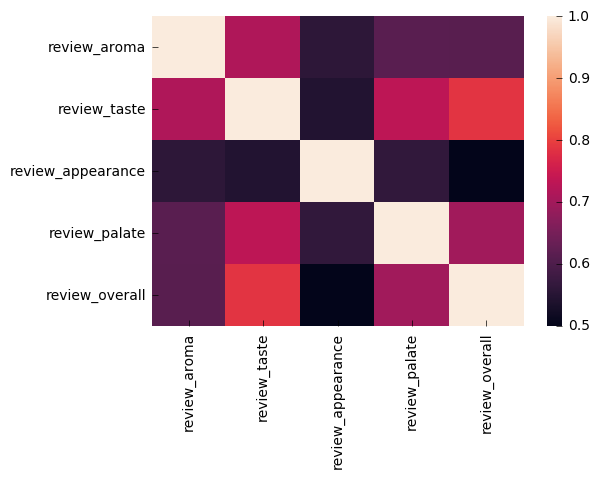

In [30]:
#Analyze the beer quality

#df_nonan['review_appearance', 'review_aroma', 'review_taste', 'review_palate', 'review_overall']

#dft = pd.DataFrame(columns=df_nonan[, 'review_aroma', 'review_taste', , ])
dft = df_nonan[['review_aroma', 'review_taste', 'review_appearance', 'review_palate', 'review_overall']]

# calculate the correlation matrix
corr = dft.corr()

# plot the heatmap
sns.heatmap(corr, annot=False,
        xticklabels=corr.columns,
        yticklabels=corr.columns)

plt.show()

In [31]:
#Correlation Matrix
corr

,review_aroma,review_taste,review_appearance,review_palate,review_overall
review_aroma,1.000000,0.714777,0.559077,0.614924,0.612793
review_taste,0.714777,1.000000,0.544579,0.732201,0.787171
review_appearance,0.559077,0.544579,1.000000,0.564555,0.498557
review_palate,0.614924,0.732201,0.564555,1.000000,0.699020
review_overall,0.612793,0.787171,0.498557,0.699020,1.000000


In [32]:
#We see high degree of correlation. For instance ... it is unlikely for a beer to have low palate score and low taste 
#score but high overall score.

#Top 3 factors : Taste - Palate - Aroma

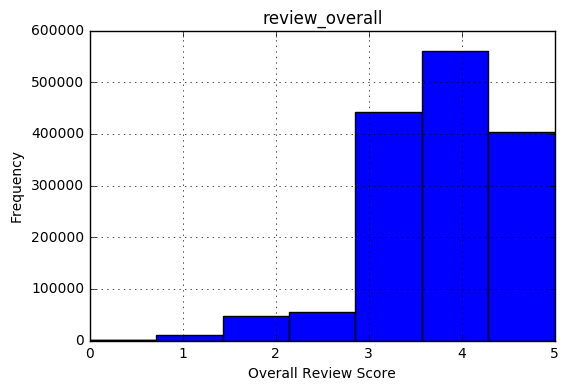

In [33]:
fig=plt.figure(figsize=(17,10))
dft.hist(column="review_overall", bins=7)
plt.xlabel("Overall Review Score",fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.xlim([0.0,5])
plt.show()

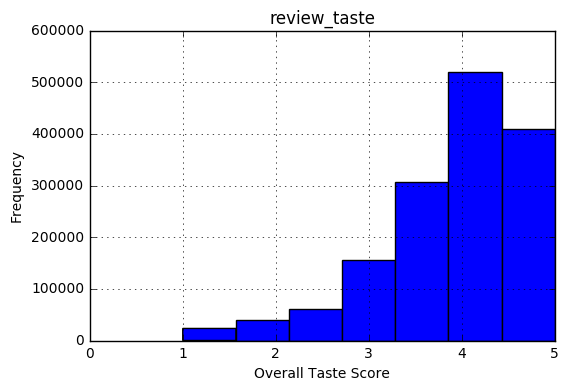

In [34]:
fig=plt.figure(figsize=(17,10))
dft.hist(column="review_taste", bins=7)
plt.xlabel("Overall Taste Score",fontsize=10)
plt.ylabel("Frequency",fontsize=10)
plt.xlim([0.0,5])
plt.show()

__ANSWER to Question 6__

In [42]:
# Create dataframe with relevant features
recommend = df_nonan[['brewery_name', 'review_overall', 'review_aroma', 'review_appearance', 'beer_style']]

# Grouping by beer_style, and aggregating statistical values
best_rec = recommend.groupby('beer_style').agg({'review_aroma': [np.mean],  'review_appearance': [np.mean], 'review_overall': [np.mean]})
best_rec.head(5)


,review_aroma,review_appearance,review_overall
,mean,mean,mean
beer_style,,,
Altbier,3.635060,3.815625,3.831625
American Adjunct Lager,2.478646,2.785717,3.010392
American Amber / Red Ale,3.653243,3.829252,3.803012
American Amber / Red Lager,3.220028,3.533225,3.577428
American Barleywine,4.022233,4.040241,3.898904


In [43]:
#Use the mean of aroma and appearance to find the best beer recommended by style
best_rec['avg_aroma_appearance'] = 0.5*((best_rec['review_appearance', 'mean'] + best_rec['review_aroma', 'mean']))

In [44]:
best_rec.sort_values(by=['avg_aroma_appearance'], ascending=False)[0:5]

,review_aroma,review_appearance,review_overall,avg_aroma_appearance
,mean,mean,mean,
beer_style,,,,
American Double / Imperial Stout,4.161478,4.164250,4.030536,4.162864
Russian Imperial Stout,4.077746,4.212713,4.024652,4.145230
Quadrupel (Quad),4.133521,4.119893,4.073156,4.126707
American Double / Imperial IPA,4.100012,4.080595,4.000323,4.090303
Gueuze,4.116501,4.037540,4.087397,4.077020


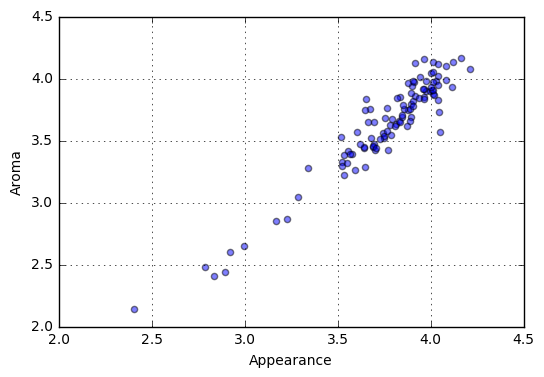

R-Squared value:  0.952834542727 implies high aroma == high appearance


In [45]:
# Plotting the data
x = best_rec['review_appearance', 'mean']
y = best_rec['review_aroma', 'mean']
plt.scatter(x, y, alpha=0.5)
plt.xlabel('Appearance'); plt.ylabel('Aroma') ;plt.grid() ; plt.show()

import scipy.stats
from sklearn.linear_model import LinearRegression

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, y)

print('R-Squared value: ', r_value, 'implies high aroma == high appearance')

In [46]:
model = LinearRegression()
model.fit(x.values.reshape(-1, 1),y.values.reshape(-1, 1))
x_new = np.array([2.6,4.8])
y_new = model.predict(x_new[:,np.newaxis])
y_new

array([[ 2.21360322],
       [ 4.90350064]])

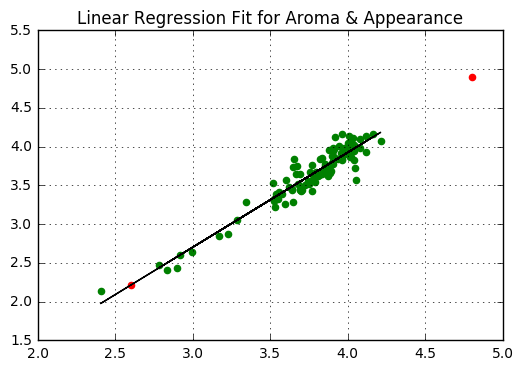

In [47]:
plt.scatter(x, y,color='g')
plt.scatter(x_new,y_new, color='r')
plt.plot(x, model.predict(x[:,np.newaxis]),color='k')
plt.grid()
plt.title('Linear Regression Fit for Aroma & Appearance')
plt.show()

__Answer to Question 7__

In [41]:
# 2.21 and 4.91